#### Importamos las librerías necesarias para el análisis

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import plotly.express as px

#### **Usaremos la base de datos Iris**

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # Longitud y grosor del Sepalo  Longitud y grosor del petalo
iris = sns.load_dataset("iris")
iris # Las primeras 5 columnas del Dataet

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Tipos de pruebas:


### a) Distribución t de Student

Queremos hacer una Reduccion de dimensionalidad para alimentar a nuestro modelo **X** y queremos queremos quitar una de las características del sepalo ya sea el grosor o la longitud

Hipotesis Nula : La Distribucion de la longitud del Sepalo y el grosor del Sepalo son muy similares por lo que su correlacion es alta y podemos eliminar una

Hipotesis Alternativa: La distribucion de la longitud y el grosor no son similares por lo que no deberiamos eliminar ninguna

$$ SE = \frac{\sigma}{\sqrt{N}} $$ 


La media muestral es el estimador usual de una media poblacional. Sin embargo, diferentes muestras escogidas de la misma población tienden en general a dar distintos valores de medias muestrales.

**El error estándar de la media** (es decir, el error debido a la estimación de la media poblacional a partir de las medias muestrales) es la desviación estándar de todas las posibles muestras (de un tamaño dado) escogidos de esa población. Además, el error estándar de la media puede referirse a una estimación de la desviación estándar, calculada desde una muestra de datos que está siendo analizada al mismo tiempo.



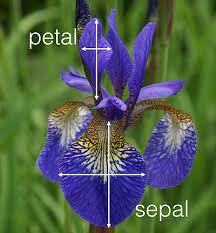

Se quiere hacer una **Comprobacion de hipotesis** se seleccionaran 2 variables numericas para ver si hay una diferencia entre la distribucion de ambas 
Se hara con el Sepalo


In [ ]:
se_length=iris.std()['sepal_length']/np.sqrt(10) #Standard Error de la longitud del sepalo con 10 muestras
se_width=iris.std()['sepal_width']/np.sqrt(10)   #Standard Error de la longitud del sepalo con 10 muestras

<ipython-input-4-5c9c98dd53d2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_length=iris.std()['sepal_length']/np.sqrt(10) #Standard Error de la longitud del sepalo con 10 muestras
<ipython-input-4-5c9c98dd53d2>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width=iris.std()['sepal_width']/np.sqrt(10)   #Standard Error de la longitud del sepalo con 10 muestras


$$ SED = \sqrt{\frac{\sigma_1^2}{N_1}+\frac{\sigma_2^2}{N_2}}$$ 






In [ ]:
sed=np.sqrt((se_length**2) + (se_width**2)) ## Standar Error Deviation

$$ t= {\frac{\overline{x_1} - \overline{x_2}}{SED}} $$ 

In [ ]:
t_stat=(iris.mean()['sepal_length'] - iris.mean()['sepal_width'])/sed
t_stat

<ipython-input-6-0c264c765844>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat=(iris.mean()['sepal_length'] - iris.mean()['sepal_width'])/sed


9.414779428410263

Nuestro valor absoluto de t es igual a 9.436693738890318 , si nuestro valor critico que es P-value es menor concluiriamos que las distribuciones son diferentes

In [ ]:
p = ttest_ind(iris['sepal_length'], iris['sepal_width'])
p
#a = 0.05 entonces t(1) = 6.31
#Valor de estímador = 36 (valor absoluto del valor t)

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)

El valor absoluto del valor t es mayor que el valor crítico, entonces rechazamos la hipótesis nula

Aceptamos la
Hipotesis Alternativa: La distribucion de la longitud y el grosor no son similares

### b) Correlación y coeficiente de Pearson

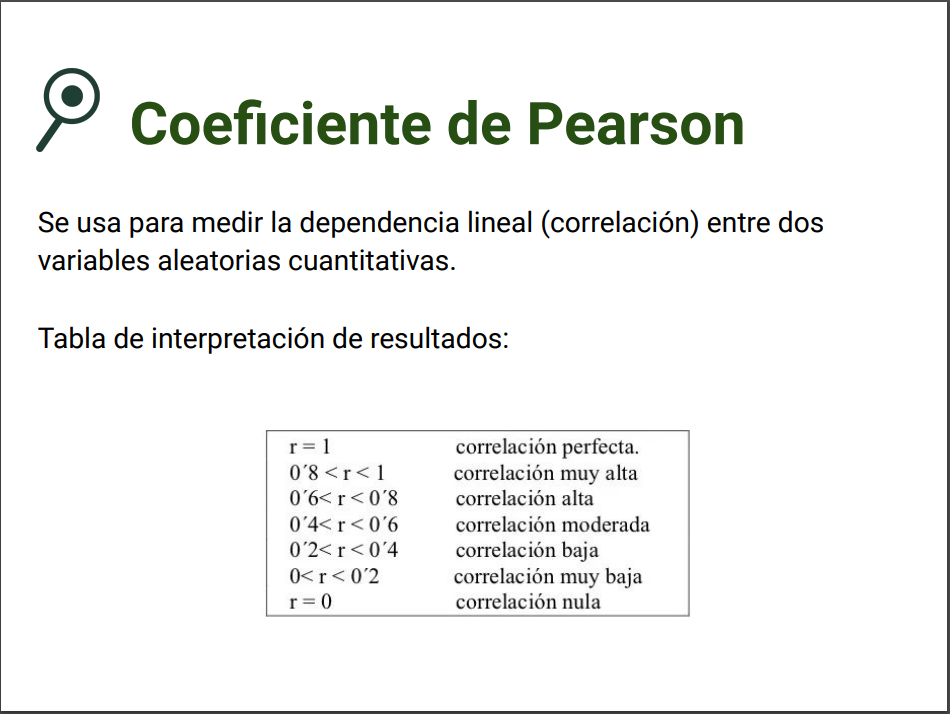

In [ ]:
# Estudiamos la correlación entre length y width
iris['sepal_length'].corr(iris['sepal_width'])

-0.11756978413300208

La correlacion que tenemos es negativa y muy cercana al 0 por lo que concluimos que no hay una correlacion con el otro

**Cuando uno sube o baja el otro no se ve afectado**

In [ ]:
# A continuación, estudiamos la correlación de Pearson entre ambas variables
st.pearsonr(iris['sepal_length'], iris['sepal_width'])

(-0.11756978413300206, 0.15189826071144766)

Correlación débil o inexistente

### c) Análisis de la varianza (ANOVA)

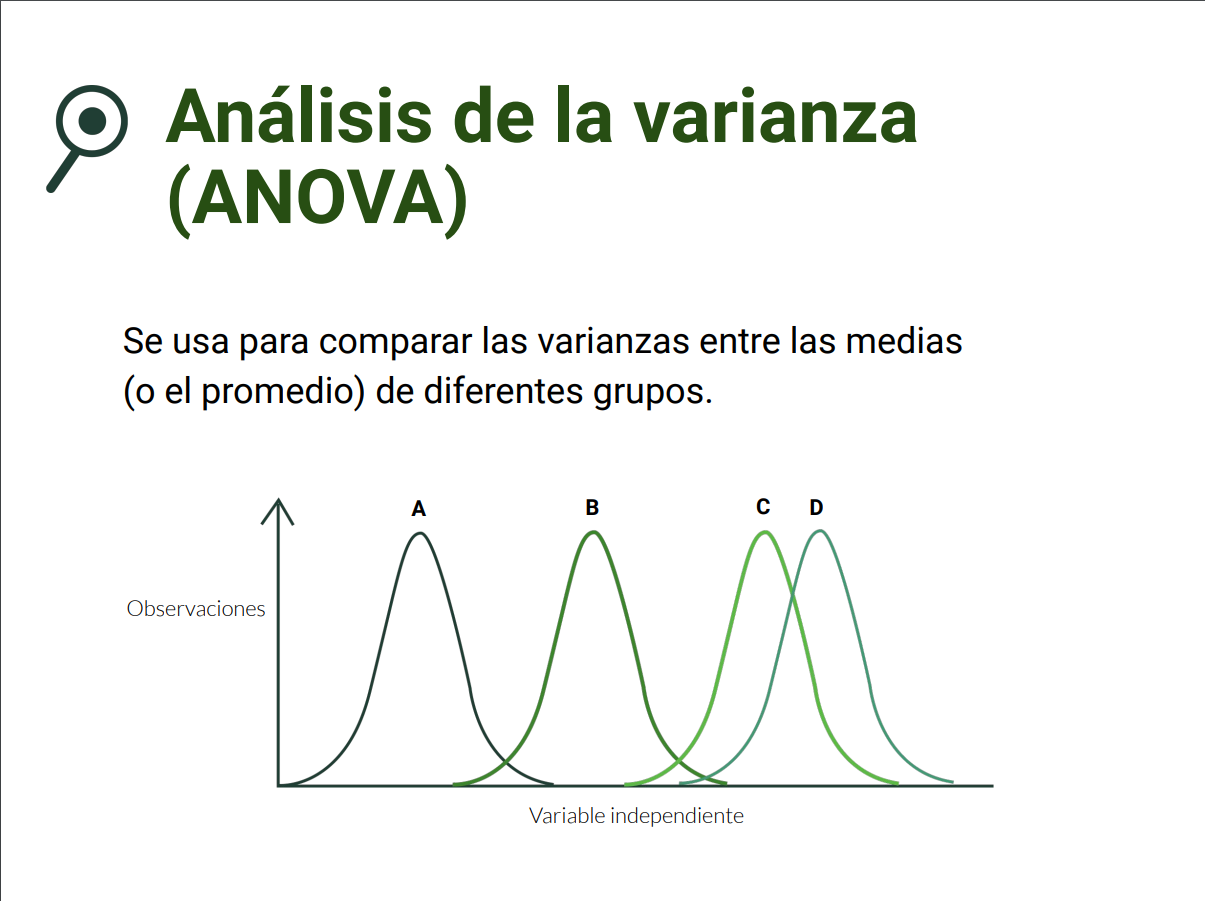

In [ ]:
f_oneway(iris['sepal_length'], iris['sepal_width'])

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

F Test es 1,335.76 y su pvalue correspondiente es 3.98e-112. Dado que es un número inferior a 0.05 rechazamos la hipótesis nula de que las medias entre variables son similares y concluimos que sí hay diferencias

## Conclusiones

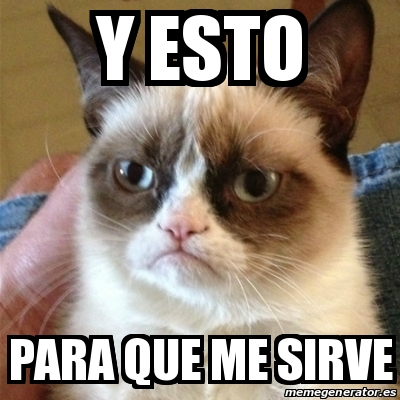

Para los que recién se inician en este mundo y se preguntan

***¿para que diantres sirve todo esto?***

en resumen, sabiendo cuales son las características que mas se relacionan con la variable objetivo podemos ver si las podemos descartar o nó al crear nuestro modelo de machine learning o nuestra red neuronal.

Para este ejemplo de iris supongamos que nuestra variable objetivo es la columna species, entonces al realizar un análisis de extracción de características el coeficiente de Pearson nos permite saber cual es la relaciòn entre estas y la variable objetivo, siempre que se hace un análisis para un dataset podrias utilizar el siguiente código :



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder() # Creamos una Instancia de la clase Ordinal Encoder
iris["species"]# Vemos las variables categoricas

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
fig = px.scatter(iris, x="petal_width", y="petal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [ ]:
iris["species"]= pd.DataFrame(oe.fit_transform(iris["species"].values.reshape(-1,1)),columns=["species"]) # Hacemos magia y cambiamos las categorias a numeros
iris["species"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [ ]:
iris.corr()["species"].sort_values() #Ejecutamos la correlacion de las variables con la columna de Especies y podemos ver cuanta correlacion tienen las otras variables

sepal_width    -0.426658
sepal_length    0.782561
petal_length    0.949035
petal_width     0.956547
species         1.000000
Name: species, dtype: float64

In [ ]:
st.pearsonr(iris['sepal_width'], iris['species'])


(-0.4266575607811244, 5.2015632551773126e-08)

In [ ]:
st.pearsonr(iris['petal_width'], iris['species'])


(0.9565473328764029, 4.1553110153181703e-81)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
columnas=["species","sepal_width","sepal_length"] #
x=np.array(iris.drop(columnas,1))
y=np.array(iris["species"])


<ipython-input-63-d612ca63685a>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.5)

print(f'Son {x_train.shape[0]} datos para entrenamiento  y {x_test.shape[0]} Datos de prueba')

Son 75 datos para entrenamiento  y 75 Datos de prueba


In [ ]:
algoritmo=LogisticRegression()
algoritmo.fit(x_train,y_train)
Y_pred=algoritmo.predict(x_test)
print("Precision Regresion Logistica: {}".format(algoritmo.score(x_train,y_train)))

Precision Regresion Logistica: 0.9866666666666667


In [ ]:
algoritmo=SVC()
algoritmo.fit(x_train,y_train)
Y_pred=algoritmo.predict(x_test)
print("Precision Regresion Logistica: {}".format(algoritmo.score(x_train,y_train))) 

Precision Regresion Logistica: 0.9866666666666667


In [ ]:
algoritmo=KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(x_train,y_train)
Y_pred=algoritmo.predict(x_test)
print("Precision Regresion Logistica: {}".format(algoritmo.score(x_train,y_train))) 

Precision Regresion Logistica: 0.9866666666666667


In [ ]:
algoritmo=DecisionTreeClassifier()
algoritmo.fit(x_train,y_train)
Y_pred=algoritmo.predict(x_test)
print("Precision Regresion Logistica: {}".format(algoritmo.score(x_train,y_train))) 

Precision Regresion Logistica: 1.0


In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


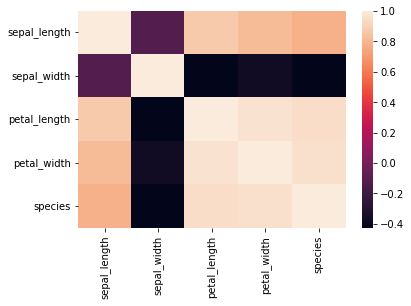

In [ ]:
sns.heatmap(iris.corr())
